In [1]:
import pickle
import numpy as np
# 형태소 분석기 불러오기
from konlpy.tag import Okt; okt = Okt()

# 워드클라우드 관련
from wordcloud import WordCloud
from PIL import Image

# 자연어처리 관련
import nltk
import re

# 파일 처리 관련
import json
import pandas as pd
import os

In [2]:
with open('df_reviews.pkl', 'rb') as f:
    df_reviews = pickle.load(f)

In [3]:
with open('df_product.pkl', 'rb') as f:
    df_product = pickle.load(f)

In [4]:
df_reviews.shape

(120, 101)

In [5]:
df_reviews.head(3)

,product_id,review0,review1,review2,review3,review4,review5,review6,review7,review8,...,review90,review91,review92,review93,review94,review95,review96,review97,review98,review99
0,2128457892,와우!!!!! 말해 뭐합니까!\n워치병 고쳤지요~\n일요일에도 상품 받을 수 있...,아이패드 에어팟 둘다 쿠팡에서 사서 이번에도 망설임 없이 애플워치도 쿠팡에서 주문 ...,여자 44mm 괜찮아요! (포장만 불만 ㅠ)\n\n전자기기 쿠팡에서 사는게 처음이라...,총평\n\n\n새해가 되면서 운동하겠다 다짐하에 고민하다가 구매했어요 !워치 6랑 ...,일단 뽑기는 성공한것같아요\n일주일정도 사용했는데 고장없이 잘쓰고 있어요.\n\n저...,저와같은 애플워치병에 걸리신 분들에게 도움을 드리고자 리뷰를 작성합니다!\n\n-구...,"애플워치를 사기 전에 모두들 제가 그랬던 것 처럼, \n정말 많은 고민을 하실 거라...",진작에 살 걸 .... 너무 편하네요\n\n주위에서 하나둘씩 구매하는거 보고 살까말...,아들이 애플워치 신상 나왔다고 사고 싶어하길래 공홈봤더니 꽤 오래걸리더라구요. \n...,...,운동량을 좀 더 늘리고 싶어서 애플워치를 구매했습니다! 진짜 언제 재입고 알람 확인...,애워 존버는 성공했습ㄴ다... 공홈에서 나이키 버전 시켜놓고 한달이나 기더려야해서 ...,애플워치 자체가 꼭 필수적인 제품은 아닙니다.\n\n다만 있을 때의 활용도가 매우 ...,손목둘레 16정도인 여자인데 화면이 큼직한게 좋아서 44mm를 사려고 매장에 갔는데...,저는 솔직히 워치가 악세사리를 뛰어넘어서 간지템이라고 생각을 합니다. 그래서 저도 ...,ㅠㅠ 고민없이 구매해도 되었을 상품이예요 \n착용 나흘째고 하루하루 친해지고 있는 ...,애플워치를 사용해보고 싶어서 구매했어요.\n애플워치 종류가 총 3가지 있는데 3는 ...,가장 큰 장점은.. 애플워치 병이 나았다는 거에요.. 1년을 참았는데 사야 낫습니다...,역시 쿠팡! 완전 칼배송이었습니다\n평생을 갤럭시만 쓰다가 최근에 아이폰으로 바꾼 ...,잘삿지 싶어요 ㅋ꙼̈ㅋ̆̎ㅋ̊̈ㅋ̌̈ㅋ̄̈ 고민에 고민에 ㅠㅠ 끝없는\n고민에 결국...
1,2004420920,"어머니 4사드리고, 동생 커플 5 1+1나왔을 때 선물주고... 어메이즈핏빕을 쓰다...",몇일 고민하다가 주문해본 샤오미미밴드5 솔직후기입니다.\n\n우선 요즘 박스대란이라...,완전 가성비 템으로 강추드려요!\n\n1.가볍고 착용감이 좋다. \n\n무겁다는 느...,우선 제가 미밴드5를 사기 전에 미밴드5와 갤럭시 핏2을\n많이 비교해보고 최종적으...,평소 핸드폰 무음으로 놔서 전화나 카톡을 확인 못할때가 많은데\n알림을 바로 확인하...,저렴하게 구매했어요 ^^\n원래는 3만원대 인데 제가 가격이 2만원대에 내려갈때 얼...,처음 리뷰써보네요 :)\n어머니 드리려고 구매했습니다\n많이 걸어 다니시는데 좀 더...,아직 2~3일밖에 안써봤지만\n\n좋은거같아요!\n\n애플워치 살까했는데 ㅋㅋ 주변...,1. 2020.10월 구매\n3개월 이상 사용해보고 후기 올려요.\n\n2. 사용하...,...,애플워치는 너무 넘사벽이라\n매번 망설였는데\n이번에 다이어트 계기로 정밀하게 측정...,저렴한 가격에 그렇지못한 기능들이네요 새벽배송으로 받아 사용하여 아직 기능들을 다 ...,제꺼 사서 써보고 너무 좋아서 남자친구 선물로 재구매 했습니다. \n남자친구가 요즘...,삼성 기어핏 4년 사용하고 사망해서 대체품을 찾았는데\n솔직히 대안이 될 만한 제품...,새벽 4시10분경..!\n새벽배송을 완료하였다는 문자메세지에\n후다닥!!\n우아아아...,스마트워치를 구입할려고 알아보던중\n갤* 과 사과는 너무 비싸므로 가성비제품 찾는중...,미밴드4를 사용하고 있습니다 \n딸아이(9세)가 제걸 너무 탐내하더라구요 \n시계도...,"구매날짜: 1월 31일, 2월 2일 \n구매가격: 3만 3천 원\n\n샤오미 미밴드...",쿠팡정발만 기다렸다 사서 쓰는 일주일 후기에요! 일단 가볍도 기능 가득이라 스마트워...,가격:29900원 \n날짜:21.4.10\n\n샤오미 미밴드를 쿠팡에서 로켓와우로 ...
2,234431834,!!!!! 리뷰가 도움이 되었으면 좋겠습니다 !!!!!\n\n양말은 세탁도 많이하고...,이사오면서 버릴양말들은 버리고 들고온 양말의 양이 적어서 쿠팡에서 주문했습니다.\n...,우리아들발이 275-280사이즈 인데 잘 맞아요 좀 얇지만 중간에 한번 더 잡아주니...,----------------------------------------------...,1.소재\n- 흔한 양말 소재 느낌\n- 발목 부분 고무줄 짱짱한편\n\n2. 착용...,동생이 운동할 때 막 신는 양말이 필요하다고 해서 화이트 색상의 베이스알파에센셜 스...,남동생이 운동용 양말이 필요하다고 해서 베이스알파에센셜 스포츠 양말을 데려와봤습니다...,음 일단 양말마다 뭔차이가 있냐 라고 생각하실 수도 있는데 진짜 이거는 검은 양말중...,일단 저렴하게 구매하고 상품은 받아보니 질감도 괜찮았어요.\n가볍게 신고 다니기 좋...,...,칼날같은 발톱때문인가..자꾸 양말에 구멍이 뚫리길래 샀는데..프리사이즈요? 남성용요...,가성비 좋은 또 하나의 쿠팡 브랜드 제입니다. \n\n요즘 양말 어디서 사려 해도 ...,남자양말을 신지않으면 작아서 매일 윗부분이 내려가곤 하는데요~\n저렴에게 쿠팡에서 ...,제 발 사이즈 270 입니다. 남자 사이즈 주문하시면 사이즈 부족하지 않습니다. 뚜...,빠른배송 +1\n가성비 +1\n스포츠 양말치고는.. 좀 얇음... -1점\n그림이랑...,남편쓰라고 구매했는데 \n좋다고 하네요 다른건 벗겨지는데 \n이양말은 딱 잡아줘서 ...,국내산 스니커즈 양말 10p. 발사이즈가 270mm인데 조금 크네요. 그래도 재질은...,많이 두툼하지는 않지만 적당히 두툼하고 양말 괜찮은대요?\n밴드부분도 튼튼해요~,짱짱해서 좋다네요 근데 금방 늘어날것같다고하네요,10족이니까 좋네요.한동안 잘 신을것같아요.추천합니다.


## 일단 하나의 상품으로 전처리 테스트

### \n 제거

In [6]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
df_review_test_series = pd.Series(df_reviews.iloc[0, 1:], name='reviews').reset_index()
del df_review_test_series['index']
df_review_test_series.head()

,reviews
0,와우!!!!! 말해 뭐합니까!\n워치병 고쳤지요~\n일요일에도 상품 받을 수 있...
1,아이패드 에어팟 둘다 쿠팡에서 사서 이번에도 망설임 없이 애플워치도 쿠팡에서 주문 ...
2,여자 44mm 괜찮아요! (포장만 불만 ㅠ)\n\n전자기기 쿠팡에서 사는게 처음이라...
3,총평\n\n\n새해가 되면서 운동하겠다 다짐하에 고민하다가 구매했어요 !워치 6랑 ...
4,일단 뽑기는 성공한것같아요\n일주일정도 사용했는데 고장없이 잘쓰고 있어요.\n\n저...


In [8]:
df_id_test = pd.Series(df_reviews['product_id'][0])

df_test = pd.DataFrame(index=range(0,100))
df_test['product_id'] = int(df_id_test)
df_test['reviews'] = df_review_test_series

In [9]:
df_test.tail()

,product_id,reviews
95,2128457892,ㅠㅠ 고민없이 구매해도 되었을 상품이예요 \n착용 나흘째고 하루하루 친해지고 있는 ...
96,2128457892,애플워치를 사용해보고 싶어서 구매했어요.\n애플워치 종류가 총 3가지 있는데 3는 ...
97,2128457892,가장 큰 장점은.. 애플워치 병이 나았다는 거에요.. 1년을 참았는데 사야 낫습니다...
98,2128457892,역시 쿠팡! 완전 칼배송이었습니다\n평생을 갤럭시만 쓰다가 최근에 아이폰으로 바꾼 ...
99,2128457892,잘삿지 싶어요 ㅋ꙼̈ㅋ̆̎ㅋ̊̈ㅋ̌̈ㅋ̄̈ 고민에 고민에 ㅠㅠ 끝없는\n고민에 결국...


In [10]:
df_test_del_nl = df_test.copy()

In [11]:
for i in range(len(df_test_del_nl.reviews)):
    if '\n' in df_test_del_nl['reviews'][i]:
        df_test_del_nl['reviews'][i] = df_test_del_nl['reviews'][i].replace("\n", ". ")

In [12]:
df_test_del_nl.tail()

,product_id,reviews
95,2128457892,ㅠㅠ 고민없이 구매해도 되었을 상품이예요 . 착용 나흘째고 하루하루 친해지고 있는 ...
96,2128457892,애플워치를 사용해보고 싶어서 구매했어요.. 애플워치 종류가 총 3가지 있는데 3는 ...
97,2128457892,가장 큰 장점은.. 애플워치 병이 나았다는 거에요.. 1년을 참았는데 사야 낫습니다...
98,2128457892,역시 쿠팡! 완전 칼배송이었습니다. 평생을 갤럭시만 쓰다가 최근에 아이폰으로 바꾼 ...
99,2128457892,잘삿지 싶어요 ㅋ꙼̈ㅋ̆̎ㅋ̊̈ㅋ̌̈ㅋ̄̈ 고민에 고민에 ㅠㅠ 끝없는. 고민에 결국...


In [13]:
df_test_del_nl.to_csv('output.tsv', index=False, sep="\t", index_label=['product_id', 'reviews'])

### 전각 문자 제거

In [14]:
!python refine.py refine.regex.txt 1 < output.tsv > output_refined.tsv

In [15]:
df_test_refined = pd.read_csv('output_refined.tsv', sep='\t')
df_test_refined.shape

(100, 2)

In [16]:
df_test_refined.head()

,product_id,reviews
0,2128457892,와우!!!!! 말해 뭐합니까!. 워치병 고쳤지요~. 일요일에도 상품 받을 수 있는 ...
1,2128457892,아이패드 에어팟 둘다 쿠팡에서 사서 이번에도 망설임 없이 애플워치도 쿠팡에서 주문 ...
2,2128457892,여자 44mm 괜찮아요! (포장만 불만 ㅠ). . 전자기기 쿠팡에서 사는게 처음이라...
3,2128457892,총평. . . 새해가 되면서 운동하겠다 다짐하에 고민하다가 구매했어요 !워치 6랑 ...
4,2128457892,일단 뽑기는 성공한것같아요. 일주일정도 사용했는데 고장없이 잘쓰고 있어요.. . 저...


In [17]:
for i in range(len(df_test['reviews'])):
    if 'ａ' in df_test['reviews'][i]:
        print(i)

- 실제로 적용이 되었을까?

In [18]:
df_test_del_nl.memory_usage(deep=True)

Index            128
product_id       800
reviews       120430
dtype: int64

In [19]:
df_test_refined.memory_usage(deep=True)

Index            128
product_id       800
reviews       120344
dtype: int64

### (To-Do) 불필요한 것들 제거

In [20]:
import re
p_tab = re.compile('\s{2,}') #2회 이상의 space

In [21]:
for i in range(len(df_test_refined.reviews)):
#     print(df_test_refined['reviews'][i])
    m = p_tab.findall(df_test_refined['reviews'][i])
    if m:
        print(m)

In [22]:
for i in range(len(df_test_refined.reviews)):
    if '\t' in df_test_refined['reviews'][i]:
        print('exist')

In [23]:
for i in range(len(df_test_refined.reviews)):
    if '  ' in df_test_refined['reviews'][i]:
        print('exist')

In [24]:
p_numbers = re.compile('\d{3,}') #3회 이상 반복되는 숫자

In [25]:
for i in range(len(df_test_refined.reviews)):
#     print(df_test_refined['reviews'][i])
    m = p_numbers.findall(df_test_refined['reviews'][i])
    if m:
        print(i, df_test_refined['reviews'][i], m, '\n\n')

1 아이패드 에어팟 둘다 쿠팡에서 사서 이번에도 망설임 없이 애플워치도 쿠팡에서 주문 했습니다 ! 로켓와우 회원으로 골드 44mm 373000원 정도 주고 구매했습니다 ! 후기 보면 배송이 좀 아쉽다고 하는 댓글들이 많아서 좀 그랬지만 도착하고 바로 뜯어보니 완전 꼼꼼하게 포장해 주셨더라구요 ! 배송은 만족 스러웠습니다 ㅎㅎ 동기화 하는데 좀 시간이 오래걸렸지만 동기화 하고 잠깐 만지작 거렸는데 진짜 너무 이뻐요ㅠㅠ 배경사진 다 꾸밀 수도 있구 운동 ? 이랑 수면 앱 등 ! 다양한 기능들이 많네요 ㅎㅎ. 배송 받은지 한시간도 안되가지고 사용법이 아직 익숙하진 않지만. 상품도 새거같구 배송도 만족스러웠어요 ! 일주일 정도 사용하고 다시 후기 쓰러올게욤. . . . 44mm 사용 3일 차 입니다 여성분들 좀 큰 거 좋아하시는 분들은. 44 쓰셔도 괜찮을거같아요 ! 제일 마음에 들었던 기능은 알림 기능과 운동 기능이에용 학생이여서 공부할때마다 휴대폰을 항상 무음 상태로 해놓고 하다보니까 중요한 메시지나 전화를 못받을때가 많았거든요ㅠㅠ 애플워치를 착용하고 공부를 하니까 전화나 문자가 올때마다 손목에 진동이 울려서 정말 편리하게 사용하고 있어요 !. . 그리고 운동 기능 ! 하루에 30분 정도는 가볍게 러닝 정도 뛰고 . 홈트는 자주하는 편이라 할 때마다 굉장히 잘 사용하고 있는 앱입니다 ! 운동 자세도 다 알려주고 시간 측정 등 기록도 다 알아서 해주니까 너무 편리하더라구용 ㅎㅎ 그리고 수면 앱 전 유료앱을 사용하지 않고 슬립 시어리 라는 앱을 사용중입니당 프리미엄 쓸려면 돈을 내야하지만 전 무료로 이용하고 있어요 시간을 측정해놓고 그 시간에 잠을 자면 어떤 숙면상태인지 다 알아서 체크가 되더라구요 . 유료앱보단 퀄리티가 떨어지지만 그래도 슬립 시어리 추천 드려용. . 그 이외에도 멤버십 앱 ! 도 정말 잘 쓰고 있어요 그냥 워치에 멤버십 등록해놓고 사용할때마다 워치로 보여드리면 적립도 돼서 굉장히ㅜ편합니당 !. . . 장점은 진짜 넘 많아요 ! 너무 만족스럽게 잘 

In [26]:
p_eng = re.compile('[a-zA-Z]{3,}') #

In [27]:
for i in range(len(df_test_refined.reviews)):
#     print(df_test_refined['reviews'][i])
    m = p_eng.findall(df_test_refined['reviews'][i])
    if m:
        print(i, df_test_refined['reviews'][i], m, '\n\n')

3 총평. . . 새해가 되면서 운동하겠다 다짐하에 고민하다가 구매했어요 !워치 6랑 보급형인 se 사이에서 무한 고민했네요 ㅋㅋ ;; . 저는 xs맥스 쓰다가 너무 커서 se2 로 갈아탄 유저에요 . 어자피 딱 기본 정도 밖에 안쓰니 se2폰도 만족하며 쓰고 있구요 ~ . 폰도 se라 시계도 그냥 se로 구매해버렸어요 ㅋㅋㅋㅋ 6와 가격차이가 20만원정도가 나네요 ㅜㅜ 잘한선택이길요... . 348680원으로 스그40mm 구매!! . 여자분이시면 40mm 사이즈도충분해요~ . 사용한지 사일차 정도 됫네요 ㅋㅋ 아이가 얼집가면 조깅하려고 대기타고 있어요 . . 6와 se 비교했을때 혈중산소앱, 상시표시형 aod(always on display) 기능을 제외하고는 se와 기능이 같아요 . 아 또 한가지 6가 컬러가 좀 더 다양하다는점 참고 하시어 구매하시면 될거 같아요 . . 역시 애플 외관상 너무 이뻐요....쓰시다가 입맛대로 줄교체도 가능하니 짱 ㅋㅋㅋㅋㅋ . 사일차 나름 만족하면서 사용하고 있어요. 핸드폰 찾기 기능은 정말 유용하네요 !! 급하게 나가야되는데 맨날 핸드폰 찾고 있었거든요 ㅜㅜ . 그외에 카톡은 음성으로 밖에 안되 좀 불편하지만 운동앱을 켜놓으면 하루얼마나 칼로리가 소모 되는지 알수 있어요 ~ 그리고 간단하게 시계로 알람 확인할수 있으니 좋아요 !!. 아직 많은기능을 해보기엔 시간부족(?) 차차 적응해보겠습니다 써보고 나머지 기능은 추가로 올릴게요 ! 잘쓰겠습니다 . . 2주정도 사용하고 추가글올려요 ! . 저는 딱 기본 기능들 밖에 안쓰다보니 진짜 편하고 좋을가? 이랬는데 시계덕분인지 평소 핸드폰 잡고 있는 시간도 좀 줄고 안하던 조깅까지 하게됬어요 !!! ㅋㅋㅋㅋㅋㅋ 개이득. 앞으로도 알차게 잘써보도록 하겠습니다 . . • 단점. . - 가격이 좀 비싸요 ㅜ. - 6와 비교해 두가지 기능이 빠져요 . . • 장점. . - 이뻐요....ㅜㅜ. - 보급이지만 아직까진 만족해요 . - 고민은 배송만 늦출뿐~ 구매각입니다 ['aod', 'alwa

In [28]:
df_test_refined.tail()

,product_id,reviews
95,2128457892,ㅠㅠ 고민없이 구매해도 되었을 상품이예요 . 착용 나흘째고 하루하루 친해지고 있는 ...
96,2128457892,애플워치를 사용해보고 싶어서 구매했어요.. 애플워치 종류가 총 3가지 있는데 3는 ...
97,2128457892,가장 큰 장점은.. 애플워치 병이 나았다는 거에요.. 1년을 참았는데 사야 낫습니다...
98,2128457892,역시 쿠팡! 완전 칼배송이었습니다. 평생을 갤럭시만 쓰다가 최근에 아이폰으로 바꾼 ...
99,2128457892,잘삿지 싶어요 ㅋ꙼̈ㅋ̆̎ㅋ̊̈ㅋ̌̈ㅋ̄̈ 고민에 고민에 ㅠㅠ 끝없는. 고민에 결국...


In [29]:
df_test_refined.to_csv('df_test_refined.tsv', index=False, sep="\t", index_label=['product_id', 'reviews'])

### tokenizing

In [30]:
df_test_refined = pd.read_csv('df_test_refined.tsv', sep='\t')
df_test_refined.shape

(100, 2)

In [31]:
df_test_refined.loc[0,['reviews']]

reviews    와우!!!!! 말해 뭐합니까!. 워치병 고쳤지요~. 일요일에도 상품 받을 수 있는 ...
Name: 0, dtype: object

In [32]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab.pos(str(df_test_refined.loc[0,['reviews']]))

[('reviews', 'SL'),
 ('와우', 'IC'),
 ('!', 'SF'),
 ('!!!!', 'SY'),
 ('말', 'NNG'),
 ('해', 'XSV+EC'),
 ('뭐', 'IC'),
 ('합니까', 'VV+EF'),
 ('!', 'SF'),
 ('.', 'SY'),
 ('워치', 'NNP'),
 ('병', 'NNG'),
 ('고쳤', 'VV+EP'),
 ('지요', 'EF'),
 ('~.', 'SY'),
 ('일요일', 'NNG'),
 ('에', 'JKB'),
 ('도', 'JX'),
 ('상품', 'NNG'),
 ('받', 'VV'),
 ('을', 'ETM'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('는', 'ETM'),
 ('.', 'SF'),
 ('..', 'SY'),
 ('Name', 'SL'),
 (':', 'SC'),
 ('0', 'SN'),
 (',', 'SC'),
 ('dtype', 'SL'),
 (':', 'SC'),
 ('object', 'SL')]

In [33]:
df_test_refined['reviews'] = df_test_refined['reviews'].apply(lambda x : str(x))
df_test_refined.loc[0,['reviews']]

reviews    와우!!!!! 말해 뭐합니까!. 워치병 고쳤지요~. 일요일에도 상품 받을 수 있는 ...
Name: 0, dtype: object

In [34]:
df_test_refined.iloc[0]

product_id                                           2128457892
reviews       와우!!!!! 말해 뭐합니까!. 워치병 고쳤지요~. 일요일에도 상품 받을 수 있는 ...
Name: 0, dtype: object

In [35]:
df_test_refined.head(1)

,product_id,reviews
0,2128457892,와우!!!!! 말해 뭐합니까!. 워치병 고쳤지요~. 일요일에도 상품 받을 수 있는 ...


In [36]:
str(df_test_refined.loc[0,['reviews']])

'reviews    와우!!!!! 말해 뭐합니까!. 워치병 고쳤지요~. 일요일에도 상품 받을 수 있는 ...\nName: 0, dtype: object'

In [37]:
FEATURE_POS = ["NNG", "VV", "MAG", "VA"]


def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 패턴.
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    
    # 특수문자를 제거하는 패턴.
    #doc = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]", " ", doc)
    
    # 영문 빼고 모두 제거하는 패턴.
    #doc = doc.replace("\n", " ")
    #doc = re.sub("[^A-Za-z ]", "", doc)
    
    return doc

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    SW.add("있어요")
    SW.add("대한")
    SW.add("합니다")
    SW.add("하는")
    SW.add("워치")
    SW.add("애플")
    SW.add("애플워치")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path, encoding="utf-8") as f:
        for word in f:
            SW.add(word.strip())
            
    return SW

def text_tokenizing(doc, tokenizer):
    """
    Input Parameter :
    
    doc - tokenizing 하는 실제 데이터.
    tokenizer - token의 단위.
    """
    
    ## To DO ##
    if tokenizer == 'words':
        return [word for word in doc.split() if word not in SW]
        
    elif tokenizer == 'NNG':
        return [noun for noun in mecab.nouns(doc) if noun not in SW]
        
    elif tokenizer == 'morphs':
        return [morph for morph in mecab.morphs(doc) if morphs not in SW]
        
    elif tokenizer == 'predefined':
        words = []
        for token in mecab.pos(doc):
            if token[1] in FEATURE_POS:
                if token[0] not in SW:
                    words.append(token[0])
        return words

In [38]:
tokenizer = "NNG"

In [39]:
SW = define_stopwords("stopwords-ko.txt")

In [40]:
tokenized_documents = [text_tokenizing(text_cleaning(doc), tokenizer) for doc in df_test_refined.reviews]# list comprehension을 이용하여 fancy하게 tokenizing을 진행해봅시다!
tokenized_documents[0], len(tokenized_documents)

(['말',
  '병',
  '일요일',
  '상품',
  '수',
  '쿠팡',
  '주식',
  '응원',
  '기사',
  '덕분',
  '일요일',
  '거',
  '생각',
  '응원',
  '감사',
  '사람',
  '거',
  '디자인',
  '색인',
  '로즈',
  '골드',
  '아이폰',
  '골',
  '실버',
  '줄질',
  '줄질',
  '관심',
  '고민',
  'ㄴ',
  'ㄴ',
  '거',
  '필요',
  '기능',
  '중요',
  '대신',
  '구매',
  '일요일',
  '강아지',
  '강아지',
  '밤',
  '기인',
  '산책',
  '축어',
  '이건',
  '검색',
  '기기',
  '결함',
  '교환',
  '신청',
  '인터넷',
  '방법',
  '나머지',
  '시계',
  '역할',
  '팟',
  '소리',
  '조절',
  '버튼',
  '거',
  '그건',
  '알람',
  '시리',
  '날씨',
  '계산기',
  '운동',
  '플',
  '다운',
  '기본',
  '플',
  '사용',
  '노래',
  '검색',
  '정도',
  '나름',
  '사용',
  '거',
  '핸드폰',
  '손목',
  '부담',
  '시계',
  '편',
  '봄',
  '여름',
  '시계',
  '겨울',
  '손',
  '옷',
  '때문',
  '불편',
  '겨울',
  '이유',
  '트랩',
  '트랩',
  '디자인',
  '생각',
  '기본',
  '며칠',
  '인터넷',
  '가지',
  '알리',
  '건',
  '네이버',
  '밀레',
  '니즈',
  '건',
  '사용',
  '여름',
  '사용',
  '거',
  '밀레',
  '니즈',
  '스포츠',
  '훠',
  '건',
  '밀레',
  '니즈',
  '여름',
  '밀레',
  '니즈',
  '겨울',
  '스포츠',
  '사용',
  '옷',
  '스포츠',
  '여름',
  '땀',
 

### 빈도 분석

In [41]:
import nltk
from pprint import pprint

total_tokens = [token for doc in tokenized_documents for token in doc]
print(len(total_tokens))

text = nltk.Text(total_tokens)
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

6442
1361
[('거', 141),
 ('구매', 141),
 ('고민', 117),
 ('사용', 116),
 ('기능', 114),
 ('수', 100),
 ('생각', 88),
 ('운동', 74),
 ('핸드폰', 64),
 ('배송', 62)]


In [42]:
# 빈도 출력 갯수.
from nltk import FreqDist

topN = 50

x = []
y = []
wordInfo = dict()

for vocab, count in text.vocab().most_common(topN):
    x.append(vocab)
    y.append(count)
    wordInfo[vocab] = count
    
test = {"Counts" : x, "Samples" : y}
print(x[:5])
print(y[:5])

['거', '구매', '고민', '사용', '기능']
[141, 141, 117, 116, 114]


### TF-IDF

In [47]:
ranking

,Term,TF-IDF
0,가격,3.042845
1,가격대,0.459537
2,가까이,0.093211
3,가능,1.571260
4,가량,0.136490
5,가로수길,0.442190
6,가방,0.298893
7,가성,0.243221
8,가슴,0.116457
9,가요,0.143384


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#TfidfVectorizer의 input으로 만들기 위한 전처리.
tfidf_docs = [" ".join(doc) for doc in tokenized_documents]

# tfidf 변환하기
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(tfidf_docs)

terms = tfidf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = X_tfidf.sum(axis=0)

# connecting term to its sums frequency
df = []
for col, term in enumerate(terms):
    df.append( (term, sums[0,col] ))

ranking = pd.DataFrame(df, columns=['Term','TF-IDF'])
rankInfo = ranking.sort_values('TF-IDF', ascending=False)[:50]

x = list(rankInfo["Term"])
y = list(rankInfo["TF-IDF"])

tfidfInfo = dict()

for vocab, tfidf in zip(x, y):
    tfidfInfo[vocab] = tfidf

print(x[:5])
print(y[:5])
print()
print(rankInfo)

['고민', '구매', '기능', '사용', '생각']
[8.481281091609603, 7.522175513782125, 6.142646268388662, 5.484026202743014, 5.297128015781287]

      Term    TF-IDF
78      고민  8.481281
102     구매  7.522176
142     기능  6.142646
436     사용  5.484026
469     생각  5.297128
355     배송  5.261669
520     손목  4.892342
278     만족  4.786068
646     여자  4.420937
705     운동  4.352476
998     쿠팡  4.278902
584     실버  4.241001
1101   핸드폰  3.780954
872     주문  3.764316
557     시계  3.390854
835     정도  3.327213
1061    포장  3.248697
603    아이폰  3.234918
1081    필요  3.082245
0       가격  3.042845
1121    확인  2.976597
1034    트랩  2.901905
1114    화면  2.896868
361     밴드  2.782959
923     착용  2.720503
439    사이즈  2.720406
954     추천  2.708316
852     제품  2.543202
109     구입  2.508709
1083    하루  2.484165
828     전화  2.365937
881     줄질  2.308834
93      공홈  2.240388
461     상품  2.132219
39     갤럭시  2.078341
257     때문  2.055888
272     마음  2.047785
935     체크  1.968112
174     남자  1.960591
1127    활용  1.913975
478     선물 

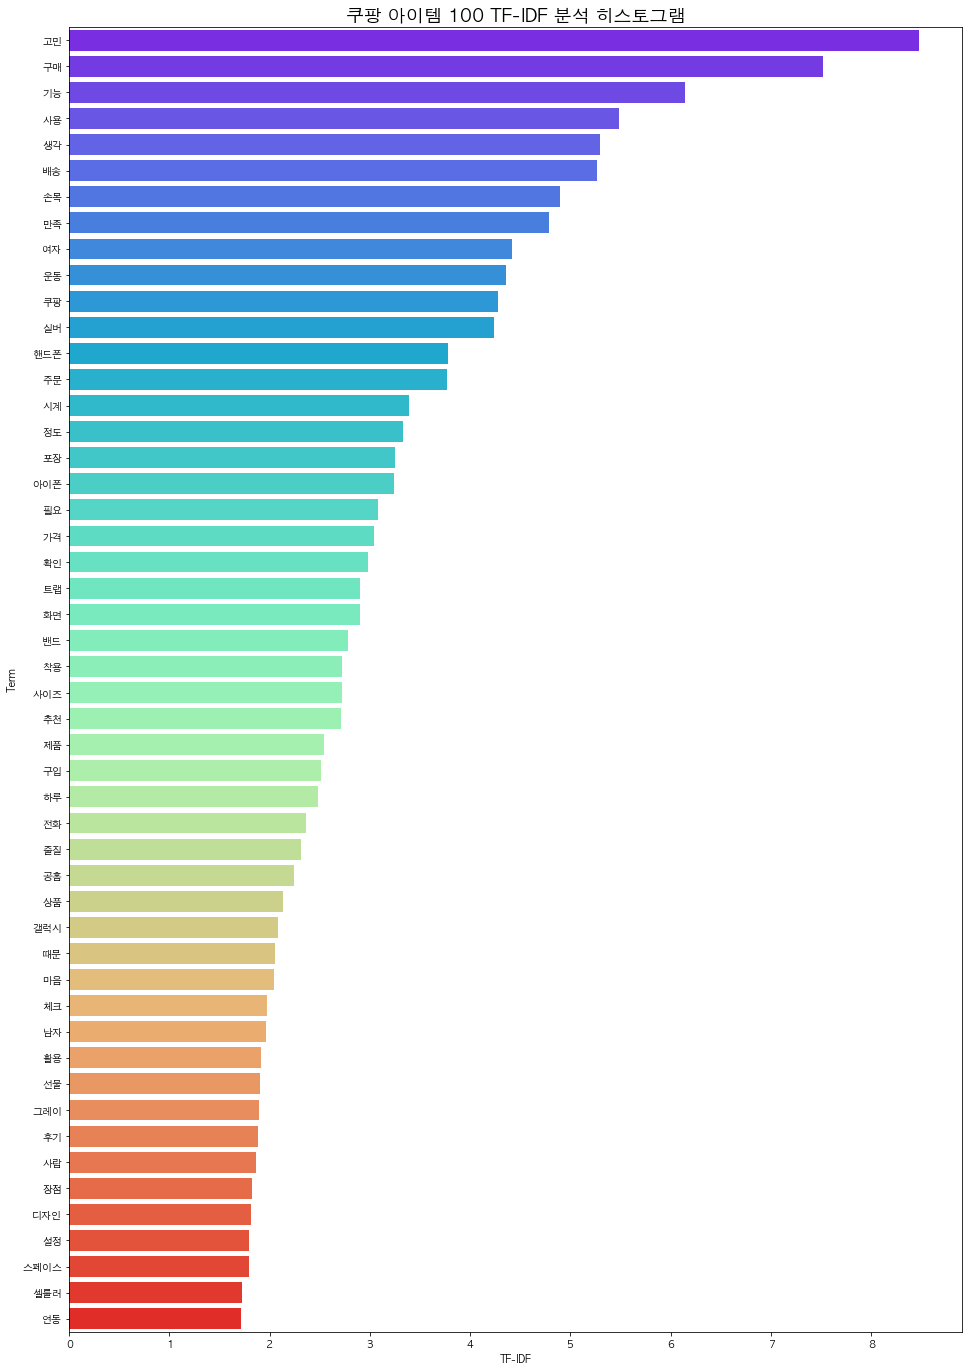

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline
topN = 100

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

plt.figure(figsize=(16, 24))
plt.title("쿠팡 아이템 %d TF-IDF 분석 히스토그램" % (topN) , fontsize=18)
plt.xlabel("Samples")
plt.ylabel("Counts")
sns.barplot(x="TF-IDF", y="Term", data=rankInfo, palette="rainbow")
plt.show()

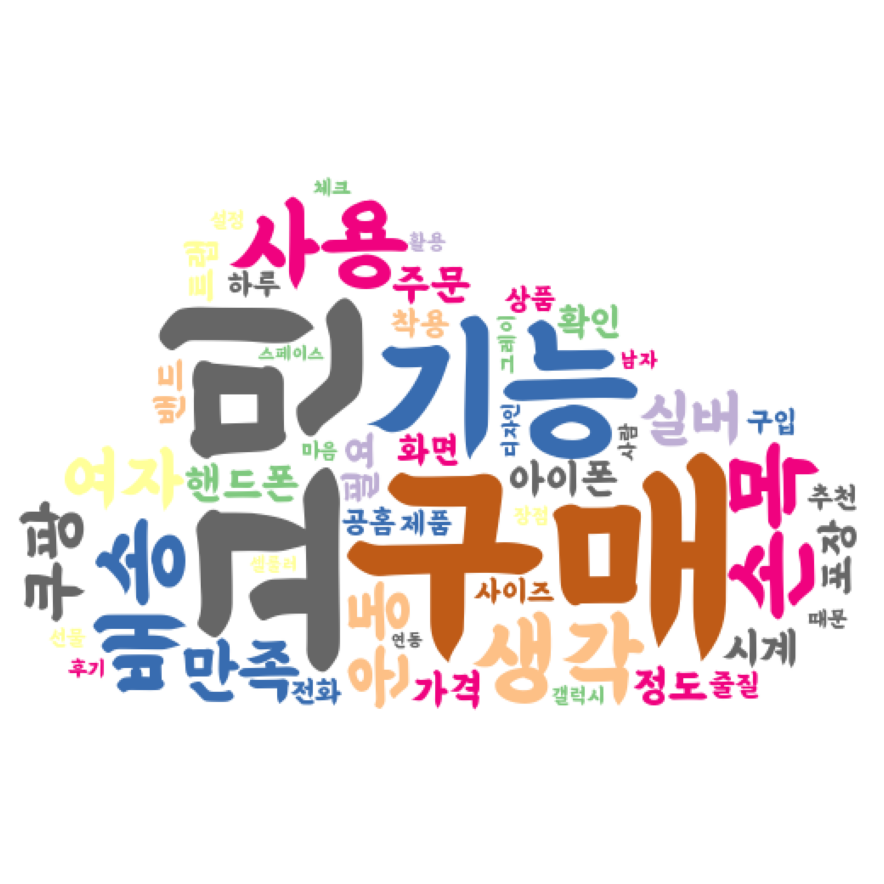

In [45]:
### 워드클라우드에 들어갈 단어 갯수 변경.
topN = 100

# 워드클라우드 만들 배경 그림 경로. ex) cloud.png

mask = np.array(Image.open("cloud.png"))
wordcloud = WordCloud(font_path = "BMEULJIROTTF",
                      relative_scaling = 0.1,
                      stopwords=SW,
                      mask=mask,
                      background_color='white',
                      colormap="Accent",
                      max_words=topN
                      ).generate_from_frequencies(tfidfInfo)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("results/wordcloud_Coupang(tfidf).png")
plt.show()

In [46]:
with open('tokenized_documents.pkl', 'wb') as f:
    pickle.dump(tokenized_documents, f)

In [48]:
with open('ranking.pkl', 'wb') as f:
    pickle.dump(ranking, f)

In [49]:
with open('rankInfo.pkl', 'wb') as f:
    pickle.dump(rankInfo, f)